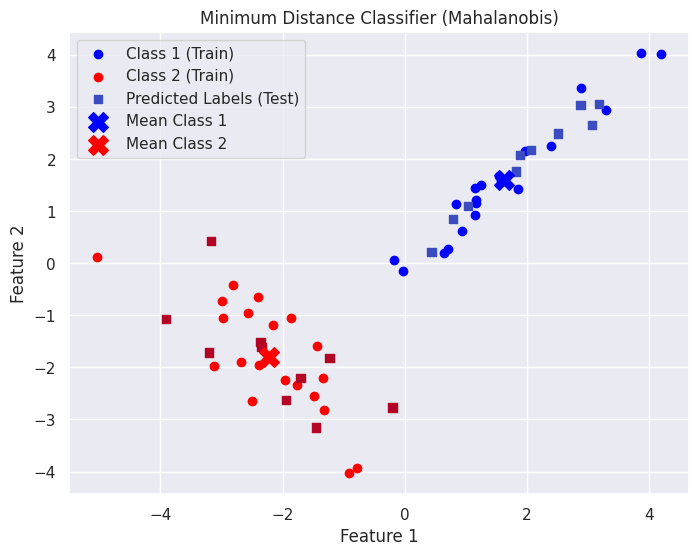

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import mahalanobis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


np.random.seed(42)
group1_train = np.random.randn(20, 2) @ np.array([[1, 0.8], [0.8, 1]]) + np.array([2, 2])
group2_train = np.random.randn(20, 2) @ np.array([[1, -0.5], [-0.5, 1]]) + np.array([-2, -2])

group1_test = np.random.randn(10, 2) @ np.array([[1, 0.8], [0.8, 1]]) + np.array([2, 2])
group2_test = np.random.randn(10, 2) @ np.array([[1, -0.5], [-0.5, 1]]) + np.array([-2, -2])

training_data = np.vstack((group1_train, group2_train))
training_labels = np.array([0] * 20 + [1] * 20)

testing_data = np.vstack((group1_test, group2_test))
testing_labels = np.array([0] * 10 + [1] * 10)

mean_group1 = np.mean(group1_train, axis=0)
mean_group2 = np.mean(group2_train, axis=0)

cov_matrix = np.cov(training_data.T)
inv_cov_matrix = np.linalg.inv(cov_matrix)

def classify_using_mahalanobis(test_data, mean1, mean2, inv_cov):
    predicted_classes = []
    for point in test_data:
        dist1 = mahalanobis(point, mean1, inv_cov)
        dist2 = mahalanobis(point, mean2, inv_cov)
        predicted_classes.append(0 if dist1 < dist2 else 1)
    return np.array(predicted_classes)


predicted_labels = classify_using_mahalanobis(testing_data, mean_group1, mean_group2, inv_cov_matrix)


accuracy = accuracy_score(testing_labels, predicted_labels)
precision = precision_score(testing_labels, predicted_labels)
recall = recall_score(testing_labels, predicted_labels)
f1 = f1_score(testing_labels, predicted_labels)

plt.figure(figsize=(8, 6))

plt.scatter(group1_train[:, 0], group1_train[:, 1], color='blue', label='Class 1 (Train)')
plt.scatter(group2_train[:, 0], group2_train[:, 1], color='red', label='Class 2 (Train)')

plt.scatter(testing_data[:, 0], testing_data[:, 1], c=predicted_labels, cmap='coolwarm', marker='s', label="Predicted Labels (Test)")

plt.scatter(mean_group1[0], mean_group1[1], color='blue', marker='X', s=200, label="Mean Class 1")
plt.scatter(mean_group2[0], mean_group2[1], color='red', marker='X', s=200, label="Mean Class 2")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Minimum Distance Classifier (Mahalanobis)")
plt.legend()
plt.grid(True)
plt.show()

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
